# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

In [4]:
"In this project we will be designing a predictive model that will quantify various features of cars to be able to predict"

'In this project we will be designing a predictive model that will quantify various features of cars to be able to predict'

In [6]:
"what features comsumers look for that leads sales in used cars. We will statistically predict factors that drive the price"

'what features comsumers look for that leads sales in used cars. We will statistically predict factors that drive the price'

In [8]:
"of used cars."

'of used cars.'

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [11]:
"Using a simple approach to analyzing the data some things I took into consideration were:"

'Using a simple approach to analyzing the data some things I took into consideration were:'

In [13]:
"1: There are missing values in the dataset, which I will have to determine to either remove, or replace"

'1: There are missing values in the dataset, which I will have to determine to either remove, or replace'

In [15]:
"2: I oberserved there are both categorical and numerical values, so I will have to find a way to quantify the categorical"

'2: I oberserved there are both categorical and numerical values, so I will have to find a way to quantify the categorical'

In [17]:
"values to be able to do a statistical analysis."

'values to be able to do a statistical analysis.'

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np
import datetime

In [22]:
df = pd.read_csv('vehicles.csv')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [26]:
df.isnull().sum()

id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

In [28]:
# We can see majority of the columns contain a large amount of missing values
# run drop na to remove rows with missing values

In [30]:
clean_df = df.dropna()

In [32]:
clean_df.isnull().sum()

id              0
region          0
price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
VIN             0
drive           0
size            0
type            0
paint_color     0
state           0
dtype: int64

In [34]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34868 entries, 126 to 426836
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            34868 non-null  int64  
 1   region        34868 non-null  object 
 2   price         34868 non-null  int64  
 3   year          34868 non-null  float64
 4   manufacturer  34868 non-null  object 
 5   model         34868 non-null  object 
 6   condition     34868 non-null  object 
 7   cylinders     34868 non-null  object 
 8   fuel          34868 non-null  object 
 9   odometer      34868 non-null  float64
 10  title_status  34868 non-null  object 
 11  transmission  34868 non-null  object 
 12  VIN           34868 non-null  object 
 13  drive         34868 non-null  object 
 14  size          34868 non-null  object 
 15  type          34868 non-null  object 
 16  paint_color   34868 non-null  object 
 17  state         34868 non-null  object 
dtypes: float64(2), int64(2), obj

In [36]:
# now lets explore the dataset a bit
# Going with the assumption that price is main driving factor, I want to compare the distribution of other features to the price of the vehicles 

The mean odometer value is: 107399.09105770334 miles


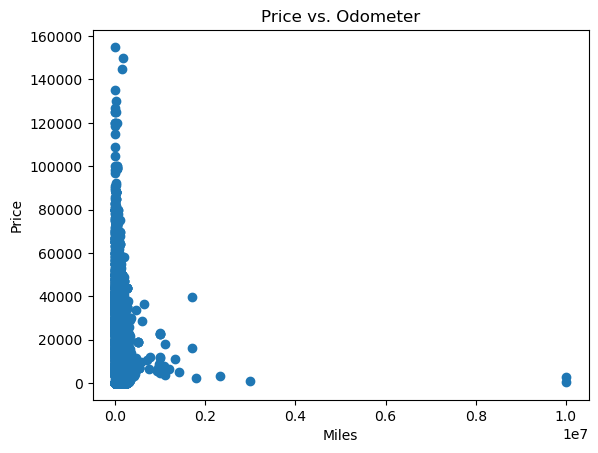

In [38]:
# lets start with a visual showing price vs mileage

plt.scatter(clean_df['odometer'], clean_df['price'])
plt.title('Price vs. Odometer')
plt.xlabel('Miles')
plt.ylabel('Price')

mean_odometer = clean_df['odometer'].mean()
print(f"The mean odometer value is: {mean_odometer} miles")

The mean age of vehicles in the dataset is: 12.823132958586669 years.
We can see a clear trend of cars decreasing in value as it's age increases.


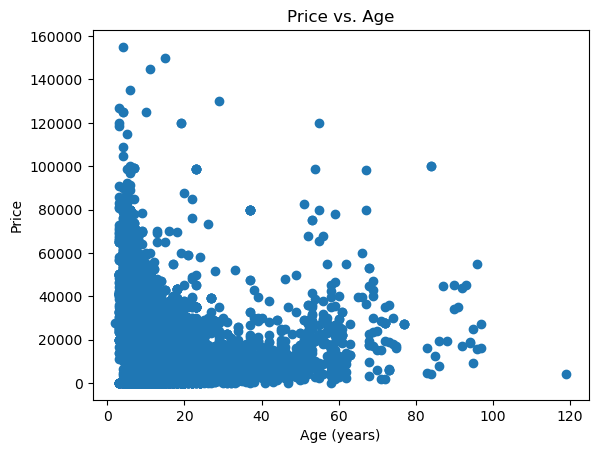

In [40]:
# next we can see the age of the cars in the dataset
# to do this, lets caclulate the age of all cars by subtracting the current year from the year it was made

clean_df = clean_df.copy()
current_year = datetime.datetime.now().year
clean_df['age'] = current_year - clean_df['year'] 

plt.scatter(clean_df['age'], clean_df['price'])
plt.title('Price vs. Age')
plt.xlabel('Age (years)')
plt.ylabel('Price')

mean_age = clean_df['age'].mean()
print(f"The mean age of vehicles in the dataset is: {mean_age} years.")
print("We can see a clear trend of cars decreasing in value as it's age increases.")

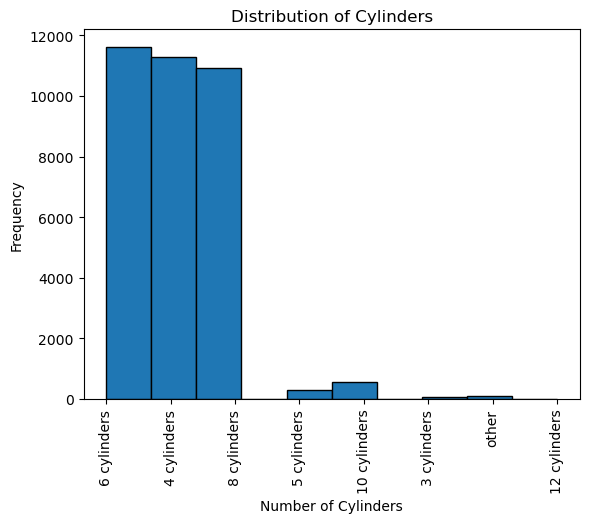

We can see 6, 4, and 8 cylinders are the most commonly purchased powertrains.


In [42]:
plt.hist(clean_df['cylinders'], edgecolor = 'black')
plt.title('Distribution of Cylinders')
plt.xlabel('Number of Cylinders')
plt.xticks(rotation = 90)
plt.ylabel('Frequency')
plt.show()

print("We can see 6, 4, and 8 cylinders are the most commonly purchased powertrains.")

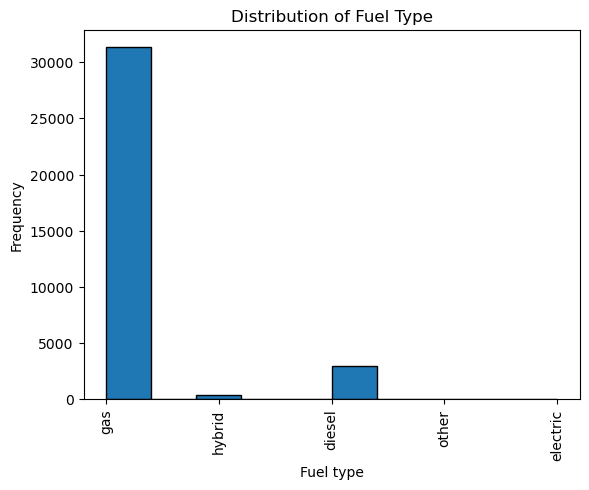

We can see the most common fuel type of cars being sold is gas


In [44]:
plt.hist(clean_df['fuel'], edgecolor = 'black')
plt.title('Distribution of Fuel Type')
plt.xlabel('Fuel type')
plt.xticks(rotation = 90)
plt.ylabel('Frequency')
plt.show()

print("We can see the most common fuel type of cars being sold is gas")

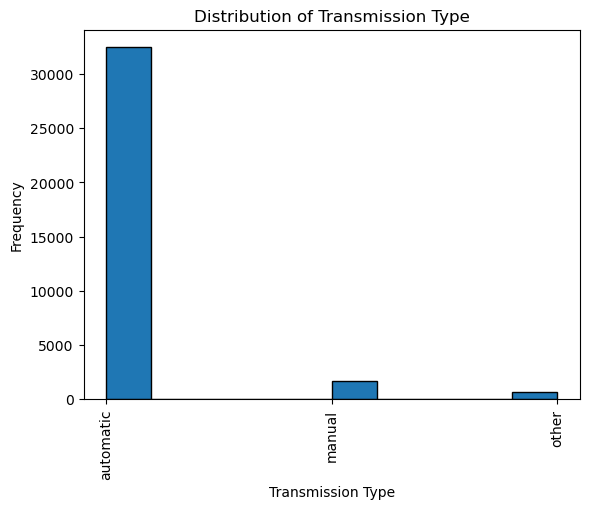

In the dataset people generally prefer to buy cars equipped with an automatic transimission


In [46]:
plt.hist(clean_df['transmission'], edgecolor = 'black')
plt.title('Distribution of Transmission Type')
plt.xlabel('Transmission Type')
plt.xticks(rotation = 90)
plt.ylabel('Frequency')
plt.show()

print("In the dataset people generally prefer to buy cars equipped with an automatic transimission")

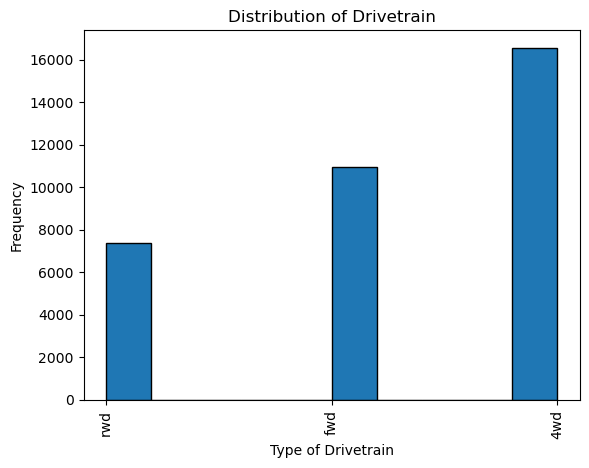

4wd is more commonly sold


In [48]:
plt.hist(clean_df['drive'], edgecolor = 'black')
plt.title('Distribution of Drivetrain')
plt.xlabel('Type of Drivetrain')
plt.xticks(rotation = 90)
plt.ylabel('Frequency')
plt.show()

print('4wd is more commonly sold')

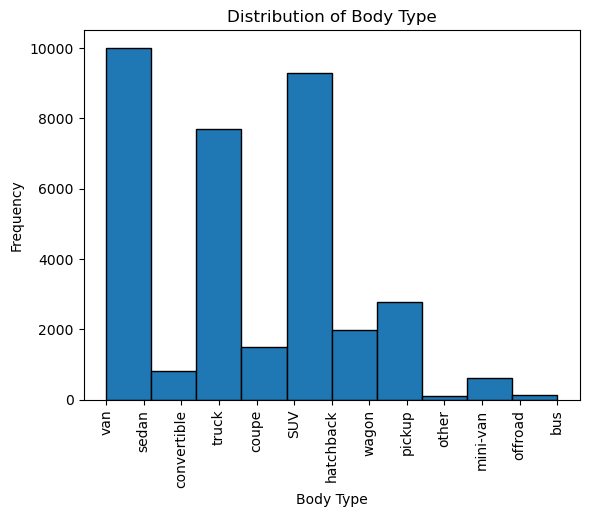

people generally prefer vans, sedans, trucks, SUVs, and hatchback


In [50]:
plt.hist(clean_df['type'], edgecolor = 'black')
plt.title('Distribution of Body Type')
plt.xlabel('Body Type')
plt.xticks(rotation = 90)
plt.ylabel('Frequency')
plt.show()

print('people generally prefer vans, sedans, trucks, SUVs, and hatchback')

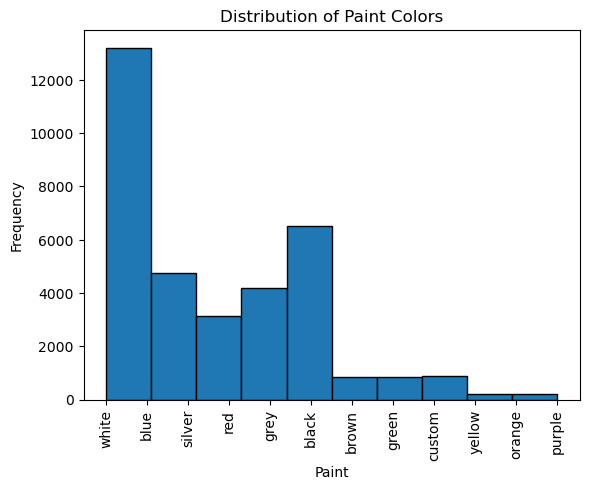

white cars are more commonly sold


In [52]:
plt.hist(clean_df['paint_color'], edgecolor = 'black')
plt.title('Distribution of Paint Colors')
plt.xlabel('Paint')
plt.xticks(rotation = 90)
plt.ylabel('Frequency')
plt.show()

print('white cars are more commonly sold')

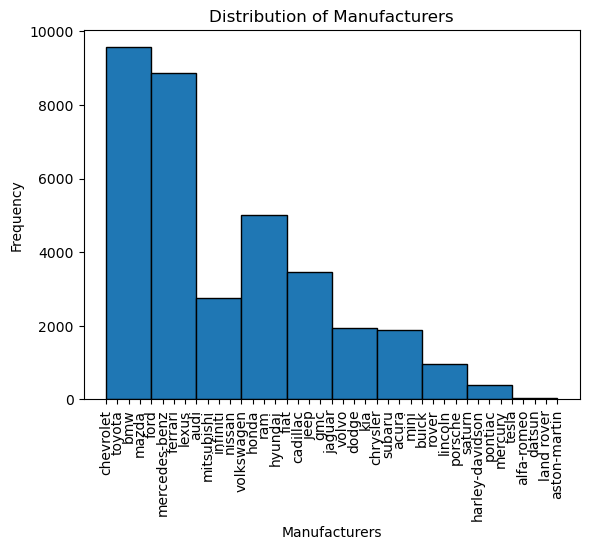

In [54]:
plt.hist(clean_df['manufacturer'], edgecolor = 'black')
plt.title('Distribution of Manufacturers')
plt.xlabel('Manufacturers')
plt.xticks(rotation = 90)
plt.ylabel('Frequency')
plt.show()

In [56]:
print('From running basic histograms to see distributions, we can observe that people generally prefer to buy used cars that are less than 100k miles, are 12 years old or less, have between 4 to 8 cylinders, run on gas, are equipped with an automatic transmission, have a 4wd drivetrain, are either vans, sedans, trucks, SUVs, or hatchbacks, are white in color, and are made by Chevrolet, Toyota, BMW, Mazda, or Ford.')

From running basic histograms to see distributions, we can observe that people generally prefer to buy used cars that are less than 100k miles, are 12 years old or less, have between 4 to 8 cylinders, run on gas, are equipped with an automatic transmission, have a 4wd drivetrain, are either vans, sedans, trucks, SUVs, or hatchbacks, are white in color, and are made by Chevrolet, Toyota, BMW, Mazda, or Ford.


### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [60]:
X = clean_df.drop(columns=['price'])
y = clean_df['price']

X['odometer'] = np.log1p(X['odometer'])  # log(1 + x) to handle zero values
X['age'] = np.log1p(X['age'])

In [62]:
# transform categorical features to numerical
categ_feat = ['manufacturer', 'fuel', 'transmission', 'type', 'model', 'condition', 'cylinders', 'drive', 'size', 'paint_color']
num_feat = ['odometer', 'age']

In [64]:
models = {'Linear Regression': LinearRegression(), 'Ridge Regression': Ridge(), 'Lasso Regression': Lasso(alpha=0.01, max_iter=20000)}

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [68]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_feat),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categ_feat)
    ])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply the preprocessing pipeline
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Initialize and fit the model
lr = LinearRegression()
lr.fit(X_train_processed, y_train)

# Predict
y_train_pred = lr.predict(X_train_processed)
y_test_pred = lr.predict(X_test_processed)

# Evaluate
train_rmse_lr = mean_squared_error(y_train, y_train_pred, squared=False)
test_rmse_lr = mean_squared_error(y_test, y_test_pred, squared=False)

print(f"Train RMSE: {train_rmse_lr}")
print(f"Test RMSE: {test_rmse_lr}\n")
print("R squared for train is:", lr.score(X_train_processed, y_train) * 100)
print("R squared for test is:", lr.score(X_test_processed, y_test) * 100)

Train RMSE: 7328.7902272566835
Test RMSE: 8997.304776763933

R squared for train is: 70.03332454808555
R squared for test is: 57.14258028607182


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [70]:
print("Running this Linear Regression model we can see from the r squared that the model explains 57% variance in the data. I will try using ridge and lasso regression as two problems that might be occuirng is: 1. overfitting and 2. feature importance or complexity. By applying Ridge or Lasso, we can simplify the model by controlling feature importance, leading to better generalization")

Running this Linear Regression model we can see from the r squared that the model explains 57% variance in the data. I will try using ridge and lasso regression as two problems that might be occuirng is: 1. overfitting and 2. feature importance or complexity. By applying Ridge or Lasso, we can simplify the model by controlling feature importance, leading to better generalization


In [72]:
ridge = Ridge()

# Train the model on the processed data
ridge.fit(X_train_processed, y_train)

# Get the feature names after OneHotEncoding and scaling
num_feat = ['odometer', 'age']
cat_feat_encoded = preprocessor.named_transformers_['cat'].get_feature_names_out(categ_feat)
all_feature_names = np.concatenate([num_feat, cat_feat_encoded])

# Get the coefficients
feature_importance = ridge.coef_

# Combine feature names with their coefficients
feature_importance_df = pd.DataFrame({'Feature': all_feature_names, 'Importance': feature_importance})

# Sort the features by their absolute importance
feature_importance_df['Abs_Importance'] = feature_importance_df['Importance'].abs()
feature_importance_df_sorted = feature_importance_df.sort_values(by='Abs_Importance', ascending=False)

# Display top features
print(feature_importance_df_sorted[['Feature', 'Importance']])

                         Feature    Importance
868          model_benz sprinter  54209.713324
1046  model_challenger srt demon  49590.354542
13          manufacturer_ferrari  46677.892165
2693                   model_k10  39744.939086
501                   model_850i  39226.746732
...                          ...           ...
4489      model_wrx premium seda     -4.174723
3335          model_quest 3.5 se     -3.045305
3668              model_sentra s     -2.862708
3261               model_prius v      2.114568
572          model_acadia denali     -2.022210

[4693 rows x 2 columns]


In [74]:
print("moercedes benz sprinter and challenger srt demon: These models have the highest positive coefficients, meaning they significantly increase the predicted price.") 

print("ferrari: This indicates that cars made by Ferrari also heavily impact the price, which makes sense given Ferrari’s premium brand.") 

print("bmw 850i: Also shows a strong indicator for high car prices.")

print("wrx premium sedan and quest 3.5 se: These models have minimal or even negative impact on price, suggesting they either have lower value or their effect on price prediction is insignificant.") 

print("sentra s and prius v: Similar to the wrx and quest 3.5, have very little influence on the predicted price, making them less important in the model.")

moercedes benz sprinter and challenger srt demon: These models have the highest positive coefficients, meaning they significantly increase the predicted price.
ferrari: This indicates that cars made by Ferrari also heavily impact the price, which makes sense given Ferrari’s premium brand.
bmw 850i: Also shows a strong indicator for high car prices.
wrx premium sedan and quest 3.5 se: These models have minimal or even negative impact on price, suggesting they either have lower value or their effect on price prediction is insignificant.
sentra s and prius v: Similar to the wrx and quest 3.5, have very little influence on the predicted price, making them less important in the model.


In [76]:
print("Next step will be to refine the features in line with what I observed")

Next step will be to refine the features in line with what I observed


In [78]:
# Filter data based on observations, adding Mercedes-Benz, Ferrari, Lexus, and Audi
refined_df = clean_df[
    (clean_df['manufacturer'].isin(['chevrolet', 'toyota', 'bmw', 'mazda', 'ford', 
                                    'mercedes-benz', 'ferrari', 'lexus', 'audi'])) &
    (clean_df['cylinders'].isin([4, 6, 8])) &
    (clean_df['fuel'].isin(['gas'])) &
    (clean_df['transmission'].isin(['automatic'])) &
    (clean_df['drive'].isin(['4wd'])) &
    (clean_df['type'].isin(['van', 'sedan', 'truck', 'suv', 'hatchback'])) &
    (clean_df['paint_color'].isin(['white'])) &
    (clean_df['odometer'] < 100000) &  # Cars less than 100k miles
    (clean_df['age'] <= 12)  # Cars less than 12 years old
]

print(refined_df.shape)

(0, 19)


In [80]:
refined_df = refined_df[refined_df['manufacturer'].isin(['chevrolet', 'toyota', 'bmw', 'mazda', 'ford', 'mercedes-benz', 'ferrari', 'lexus', 'audi'])]
print("After manufacturer filter:", refined_df.shape)

refined_df = refined_df[refined_df['fuel'].isin(['gas'])]
print("After fuel filter:", refined_df.shape)

refined_df = refined_df[refined_df['transmission'].isin(['automatic'])]
print("After transmission filter:", refined_df.shape)

refined_df = refined_df[refined_df['type'].isin(['van', 'sedan', 'truck', 'suv', 'hatchback'])]
print("After type filter:", refined_df.shape)

After manufacturer filter: (0, 19)
After fuel filter: (0, 19)
After transmission filter: (0, 19)
After type filter: (0, 19)


In [86]:
# Proceed with the same preprocessing and modeling steps as before
X_refined = refined_df.drop(columns=['price'])
y_refined = refined_df['price']

# Re-run preprocessing and model fitting
X_train, X_test, y_train, y_test = train_test_split(X_refined, y_refined, test_size=0.2, random_state=42)

# Apply transformations
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Fit the Ridge model
ridge = Ridge()
ridge.fit(X_train_processed, y_train)

# Predict and evaluate
y_train_pred = ridge.predict(X_train_processed)
y_test_pred = ridge.predict(X_test_processed)

train_rmse_ridge = mean_squared_error(y_train, y_train_pred, squared=False)
test_rmse_ridge = mean_squared_error(y_test, y_test_pred, squared=False)

print(f"Train RMSE: {train_rmse_ridge}")
print(f"Test RMSE: {test_rmse_ridge}")
print("R squared for train:", ridge.score(X_train_processed, y_train))
print("R squared for test:", ridge.score(X_test_processed, y_test))

Train RMSE: 7531.301441778017
Test RMSE: 9236.669956385616
R squared for train: 0.622420413899099
R squared for test: 0.4746010132948705


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [92]:
# Initial filtering without the 'type' filter
refined_df = clean_df.copy()
refined_df = refined_df[refined_df['manufacturer'].isin(['chevrolet', 'toyota', 'bmw', 'mazda', 'ford', 'mercedes-benz', 'ferrari', 'lexus', 'audi'])]
refined_df = refined_df[refined_df['fuel'].isin(['gas'])]
refined_df = refined_df[refined_df['transmission'].isin(['automatic'])]

# Check the shape after filtering
print("After initial filtering (excluding 'type'):", refined_df.shape)

# Define features and target
X_refined = refined_df.drop(columns=['price'])
y_refined = refined_df['price']

# Re-run preprocessing and model fitting
X_train, X_test, y_train, y_test = train_test_split(X_refined, y_refined, test_size=0.2, random_state=42)

# Apply transformations
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Initialize and fit Ridge Regression
ridge = Ridge()
ridge.fit(X_train_processed, y_train)

# Predict
y_train_pred_ridge = ridge.predict(X_train_processed)
y_test_pred_ridge = ridge.predict(X_test_processed)

# Evaluate Ridge Regression
train_rmse_ridge = mean_squared_error(y_train, y_train_pred_ridge, squared=False)
test_rmse_ridge = mean_squared_error(y_test, y_test_pred_ridge, squared=False)

print(f"Ridge Train RMSE: {train_rmse_ridge}")
print(f"Ridge Test RMSE: {test_rmse_ridge}\n")
print("Ridge R squared for train is:", ridge.score(X_train_processed, y_train) * 100)
print("Ridge R squared for test is:", ridge.score(X_test_processed, y_test) * 100)

After initial filtering (excluding 'type'): (15533, 19)
Ridge Train RMSE: 7531.301441778017
Ridge Test RMSE: 9236.669956385616

Ridge R squared for train is: 62.2420413899099
Ridge R squared for test is: 47.460101329487046


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

In [90]:
print('From looking at the ridge regression model, the manufacturer seems to be a big driver in used car prices. The data has quite a bit of overfitting and futher simplification can show what other features drive price predcition') 

From looking at the ridge regression model, the manufacturer seems to be a big driver in used car prices. The data has quite a bit of overfitting and futher simplification can show what other features drive price predcition
